In [88]:
data = '''R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)'''

In [142]:
from aocd import get_data
data = get_data(day=18, year=2023)

In [2]:
import numpy as np
from skimage import draw
from scipy import ndimage
%matplotlib inline
import matplotlib.pyplot as plt

In [143]:
ilines = [ l.split(' ') for l in data.split('\n') ]
instructions = []
for d,c,h in ilines:
    match d:
        case 'U': dd = (-1,0)
        case 'D': dd = (1,0)
        case 'L': dd = (0,-1)
        case 'R': dd = (0,1)
    dd = np.array(dd)
    c = int(c)
    h = h[1:-1]
    instructions.append((d,dd,c,h))
#instructions  

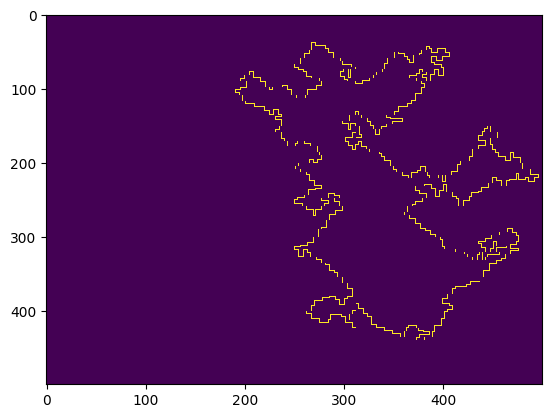

In [148]:
# just make it large who cares
artibrary_large = 500
board = np.zeros((artibrary_large,artibrary_large), dtype=int)
start = np.array((artibrary_large//2,artibrary_large//2))
for d, dd, c, h in instructions:
    c = start+(dd*c)
        
    rr, cc = draw.line(*start, *c)
    board[rr, cc] = 1
    start = c
board
plt.imshow(board, interpolation='nearest', aspect='auto')
plt.show()

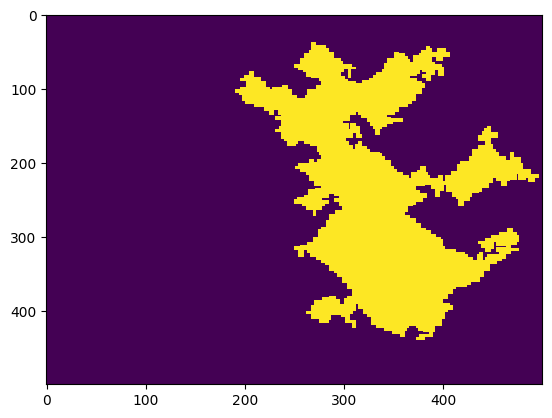

In [158]:
board = ndimage.binary_fill_holes(board).astype(int)
plt.imshow(board, interpolation='nearest', aspect='auto')
plt.show()

In [159]:
board.sum()

48400

In [160]:
def decode(hexstr):
    distance = int(hexstr[1:6], 16)
    direction = hexstr[6]
    #0 means R, 1 means D, 2 means L, and 3 means U
    match direction:
        case '0': direction = 'R'
        case '1': direction = 'D'
        case '2': direction = 'L'
        case '3': direction = 'U'
    return direction, distance

In [161]:
instructions = []
for _,_,h in ilines:
    d, c = decode(h[1:-1])
    match d:
        case 'U': dd = (-1,0)
        case 'D': dd = (1,0)
        case 'L': dd = (0,-1)
        case 'R': dd = (0,1)
    dd = np.array(dd)
    instructions.append((d,dd,c,h))
#instructions  

In [162]:
poly = [(0,0)]
start = np.array((0,0))
for d, dd, c, _ in instructions:
    c = start+dd*c
    poly.append(tuple(c))
    start = c

In [165]:
def picks_theorem(coordinates):
    # Given a list of coordinates (vertices) of the polygon
    n = len(coordinates)
    
    # Calculate the area of the polygon using Pick's Theorem
    area = 0
    
    for i in range(n - 1):
        x1, y1 = coordinates[i]
        x2, y2 = coordinates[i + 1]
        area += x1 * y2 - x2 * y1
    
    # Closing the loop by connecting the last and first points
    x1, y1 = coordinates[n - 1]
    x2, y2 = coordinates[0]
    area += x1 * y2 - x2 * y1
    
    area = abs(area) / 2
    
    # Calculate the number of lattice points on the boundary
    boundary_points = sum(abs(x1 - x2) + abs(y1 - y2) for (x1, y1), (x2, y2) in zip(coordinates, coordinates[1:]))
    boundary_points += abs(coordinates[n - 1][0] - coordinates[0][0]) + abs(coordinates[n - 1][1] - coordinates[0][1])
    
    # Calculate the number of lattice points inside the polygon
    interior_points = area - boundary_points / 2 + 1
    
    return int(area), int(interior_points), int(boundary_points)
area, interior, bound = picks_theorem(poly)

In [166]:
interior+bound

72811019847283